# Réseaux de noreunes (ANN) à 2 couches avec Gradient Descent et génération du Dataset
Objectif c'est de classifier les éléments du Dataset généré avec un réseaux de noreunes à <b> 2 couches</b>
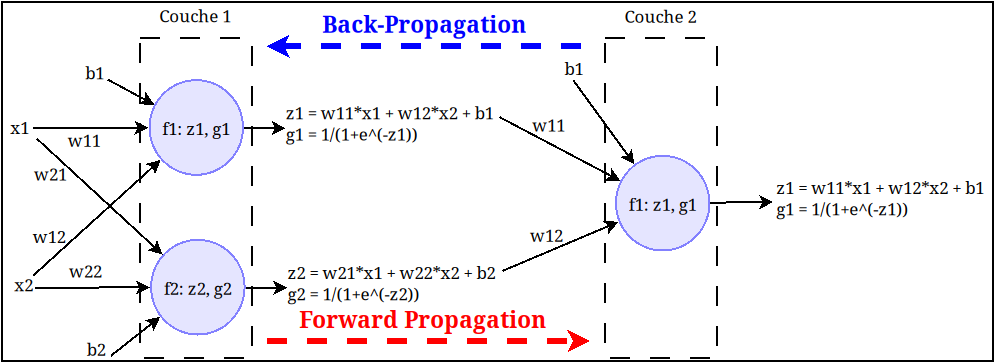

In [81]:
import numpy as np #Manipuler le Dataset comme matrice
import matplotlib.pyplot as plt #Visualiser Les données
from sklearn.datasets import make_blobs, make_circles #Générer un Dataset
from sklearn.metrics import accuracy_score, log_loss

In [82]:
#Générer un Dataset avec 2 features et 100 enregistrements
#Matrice X des features et y target
X, y = make_circles(n_samples=450, noise=0.1, factor=0.3, random_state=0)
X = X.T #Transposée de X
y = y.reshape((1, y.shape[0])) #Redimenssionner y vers un vecteur ligne

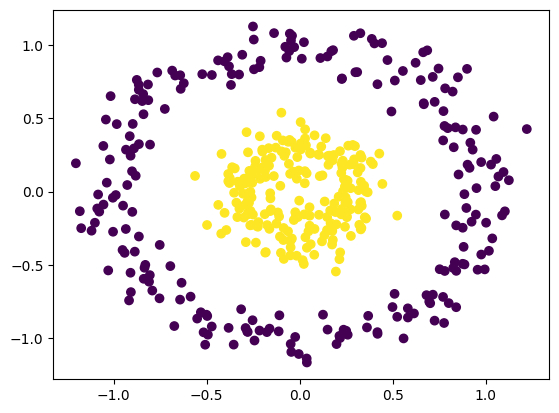

In [83]:
plt.scatter(X[0, :], X[1, :], c=y) #Visualiser le Dataset
plt.show()

### Créer des vecteur W1 et W2, b1 et b2
#### Paramètres de la 1ère couche
$W1 = \begin{pmatrix} w_{11}&w_{12} \\ w_{21}&w_{22} \end{pmatrix}$ et b1
#### Paramètres de la 2ème couche
$W2 = \begin{pmatrix} w_{11}&w_{12}\end{pmatrix}$ et b2

In [84]:
def paramètres(n0 = 2, n1 = 2, n2 = 1):
    #n0 = nbr de xi
    #n1 = nbr de perceptron de la couche 1
    #n2 = nbr de perceptron de la couche 2
    
    #paramètres de la 1ère couche
    W1 = np.random.randn(n1, n0)
    b1 = np.zeros((n1, 1))
    
    #paramètres de la 2ème couche
    W2 = np.random.randn(n2, n1)
    b2 = np.zeros((n2, 1))
    
    #Dictionnaire pour enregistrer les paramètres
    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    return parametres

### Modèle G(X) sous forme d'une fonction de Sigmoide : 
$Z = \theta.dot(X) + b$

$G(X) = \frac{1}{1+e^{-Z}}$

In [85]:
#Modèle G(X) 
def G(X, theta, b):
    Z = theta.dot(X) + b
    return Z, 1/(1+np.e**(-Z))

### Forward propagation :

In [86]:
def forwardPropagation(X, parametres):
    
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']
    
    Z1, A1 = G(X, W1, b1)
    Z2, A2 = G(A1, W2, b2)

    #Dictionnaire pour enregistrer les activations
    activations = {
        'A1': A1,
        'A2': A2
    }
    
    return activations


### Back-propagation :
Pour calculer les <b>gradients</b> de chaque couche

In [87]:
def backPropagation(X, y, parametres, activations):
    
    A1 = activations['A1']
    A2 = activations['A2']
    W2 = parametres['W2']

    m = y.shape[1]

    dZ2 = A2 - y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m * np.sum(dZ2, axis=1, keepdims = True)

    dZ1 = np.dot(W2.T, dZ2) * A1 * (1 - A1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1, axis=1, keepdims = True)

    gradients = {
        'dW1' : dW1,
        'db1' : db1,
        'dW2' : dW2,
        'db2' : db2
    }
    
    return gradients

### Mettre à jour les paramètres selon l'algorithme de Gradien Descent:

In [88]:
def update(gradients, parametres, learning_rate):
    W1 = parametres['W1']
    b1 = parametres['b1']
    W2 = parametres['W2']
    b2 = parametres['b2']

    dW1 = gradients['dW1']
    db1 = gradients['db1']
    dW2 = gradients['dW2']
    db2 = gradients['db2']
    
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    parametres = {
        'W1': W1,
        'b1': b1,
        'W2': W2,
        'b2': b2
    }
    
    return parametres

In [89]:
def predict(X, parametres):
  activations = forwardPropagation(X, parametres)
  A2 = activations['A2']
  return A2

In [90]:
def neural_network(X, y, n1=2, learning_rate = 0.1, n_iter = 10000):

    # initialisation parametres
    n0 = X.shape[0] #=2
    n2 = y.shape[0] #=1
    np.random.seed(0)
    parametres = paramètres(n0, n1, n2)


    for i in range(n_iter):
        activations = forwardPropagation(X, parametres)
        A2 = activations['A2']
        
        gradients = backPropagation(X, y, parametres, activations)
        parametres = update(gradients, parametres, learning_rate)
    
    return parametres, activations



### Résultats des dérnières valeurs des paramètres W1, W2, b1, b2 et de la fonction d'activation de la couche 2

In [91]:
parametres

{'W1': array([[2.36440234, 1.47582783],
        [1.92281887, 2.71943593]]),
 'b1': array([[ 1.4360577 ],
        [-1.72398202]]),
 'W2': array([[ 2.16706818, -2.49181499]]),
 'b2': array([[-0.95913761]])}

In [92]:
parametres, activations = neural_network(X, y, n1=2, learning_rate = 0.1, n_iter = 1000)
print(parametres)
print(activations)

{'W1': array([[2.36440234, 1.47582783],
       [1.92281887, 2.71943593]]), 'b1': array([[ 1.4360577 ],
       [-1.72398202]]), 'W2': array([[ 2.16706818, -2.49181499]]), 'b2': array([[-0.95913761]])}
{'A1': array([[0.207601  , 0.94770148, 0.8958477 , 0.86128453, 0.87969885,
        0.19419864, 0.97878523, 0.88901118, 0.83692502, 0.81623087,
        0.67535384, 0.3878697 , 0.59485358, 0.34912289, 0.5664097 ,
        0.98322183, 0.17430861, 0.98157393, 0.9829443 , 0.87438286,
        0.75725401, 0.61683453, 0.83988523, 0.24531728, 0.84606223,
        0.72075297, 0.69151798, 0.97073543, 0.98387576, 0.95085646,
        0.91929888, 0.7157546 , 0.79645156, 0.97960505, 0.89507886,
        0.89249468, 0.89559731, 0.92275842, 0.74282841, 0.69077098,
        0.28066814, 0.96900014, 0.87640072, 0.93261107, 0.67860046,
        0.66349742, 0.35419422, 0.27752804, 0.64342948, 0.86312781,
        0.8643739 , 0.56544384, 0.44117319, 0.98360349, 0.38015846,
        0.72226419, 0.61488274, 0.98418159, 0

### Prédiction
### Exp1 :
x1 = 6 et x2 = 6

### Prédiction :
<b>proche de 1</b>

### Exp2 :
x1 = -2 et x2 = -2

### Prédiction :
<b>proche de 0</b>

In [93]:
predict(np.array([6, 6]), parametres) #proche de 1

array([[0.21688974, 0.21688974]])

In [94]:
predict(np.array([-2, -2]), parametres) #proche de 0

array([[0.27785149, 0.27721203]])

# <font color='red'>Affichage de la frontière de décision ?????</font>

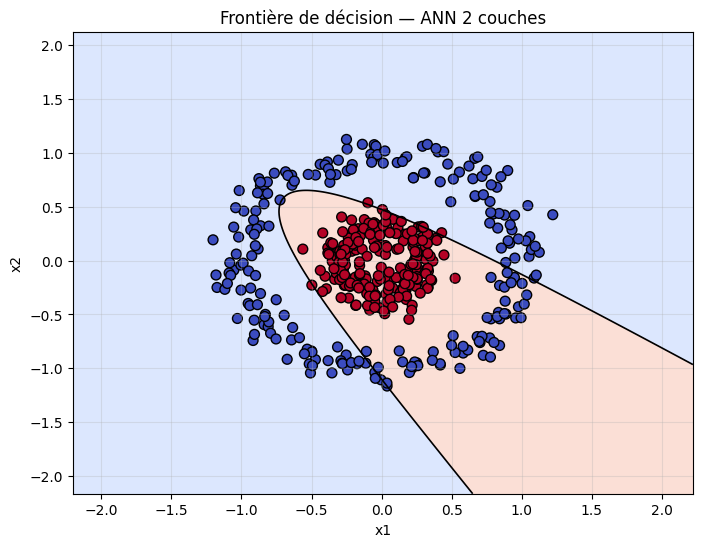

In [95]:
# Tracer la frontière de décision du réseau à 2 couches
# Construire une grille couvrant les données
x_min, x_max = X[0, :].min() - 1.0, X[0, :].max() + 1.0
y_min, y_max = X[1, :].min() - 1.0, X[1, :].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Préparer la grille pour la prédiction : forme (2, nb_points)
grid = np.c_[xx.ravel(), yy.ravel()].T

# Obtenir les probabilités prédites par le réseau
a2 = predict(grid, parametres)  # forme (1, nb_points)
Z = a2.reshape(xx.shape)

# Visualisation
plt.figure(figsize=(8, 6))
# Région de décision (contourf) et frontière de décision (niveau 0.5)
plt.contourf(xx, yy, Z, levels=[0.0, 0.5, 1.0], alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=1.2)

# Points d'entraînement
plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap='coolwarm', edgecolors='k', s=50)
plt.title('Frontière de décision — ANN 2 couches')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha=0.3)
plt.show()


n1=1, n_iter=100 -> acc=0.5244, loss=0.6952
n1=1, n_iter=500 -> acc=0.5244, loss=0.6909
n1=1, n_iter=1000 -> acc=0.5533, loss=0.6866
n1=2, n_iter=100 -> acc=0.5444, loss=0.6925
n1=2, n_iter=500 -> acc=0.7956, loss=0.6470
n1=2, n_iter=1000 -> acc=0.8756, loss=0.5777
n1=3, n_iter=100 -> acc=0.5000, loss=0.6923
n1=3, n_iter=500 -> acc=0.8289, loss=0.6785
n1=3, n_iter=1000 -> acc=0.8956, loss=0.6273
n1=4, n_iter=100 -> acc=0.4956, loss=0.6937
n1=4, n_iter=500 -> acc=0.8000, loss=0.6884
n1=4, n_iter=1000 -> acc=0.7578, loss=0.6714
n1=5, n_iter=100 -> acc=0.4933, loss=0.6973
n1=5, n_iter=500 -> acc=0.6311, loss=0.6737
n1=5, n_iter=1000 -> acc=0.8978, loss=0.6236

=== Elite model ===
n1=5, n_iter=1000, acc=0.8978, loss=0.6236


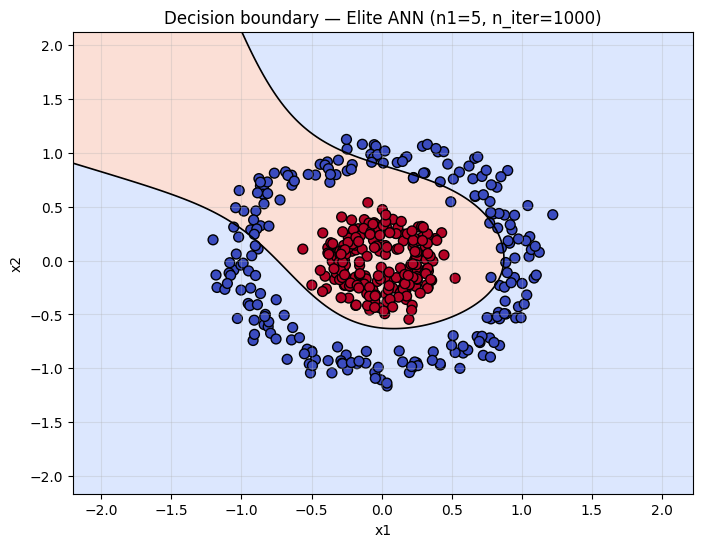

In [ ]:
# Grid search over number of neurons in the hidden layer (n1) and number of iterations (n_iter)
# to find the "elite" model (best accuracy on the training set).
from sklearn.metrics import accuracy_score, log_loss

n1_list = [1, 2, 3, 4, 5]
n_iter_list = [100, 500, 10000]
learning_rate = 0.1

best = {'acc': -1}

for n1 in n1_list:
    for n_iter in n_iter_list:
        # Train the network with the current configuration
        params_tmp, activ_tmp = neural_network(X, y, n1=n1, learning_rate=learning_rate, n_iter=n_iter)
        # Predict on the training set
        preds = predict(X, params_tmp)
        preds_label = (preds > 0.5).astype(int)
        acc = accuracy_score(y.ravel(), preds_label.ravel())
        loss = log_loss(y.ravel(), preds.ravel())

        print(f"n1={n1}, n_iter={n_iter} -> acc={acc:.4f}, loss={loss:.4f}")

        # Keep the best model by accuracy (tie-breaker: lower loss)
        if acc > best['acc'] or (acc == best.get('acc', -1) and loss < best.get('loss', 1e9)):
            best.update({
                'acc': acc,
                'loss': loss,
                'n1': n1,
                'n_iter': n_iter,
                'params': params_tmp,
                'activ': activ_tmp
            })

# Summary of the elite model
print('\n=== Elite model ===')
print(f"n1={best['n1']}, n_iter={best['n_iter']}, acc={best['acc']:.4f}, loss={best['loss']:.4f}")

# Plot decision boundary of the elite model
params_elite = best['params']

# Reuse the grid used earlier
x_min, x_max = X[0, :].min() - 1.0, X[0, :].max() + 1.0
y_min, y_max = X[1, :].min() - 1.0, X[1, :].max() + 1.0
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))
grid = np.c_[xx.ravel(), yy.ravel()].T

# Get predictions and reshape
a2 = predict(grid, params_elite)
Z = a2.reshape(xx.shape)

plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, levels=[0.0, 0.5, 1.0], alpha=0.3, cmap='coolwarm')
plt.contour(xx, yy, Z, levels=[0.5], colors='k', linewidths=1.2)
plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap='coolwarm', edgecolors='k', s=50)
plt.title(f"Decision boundary — Elite ANN (n1={best['n1']}, n_iter={best['n_iter']})")
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(alpha=0.3)
plt.show()